# Projet de Math-info : Courbes de niveau

### Isambert Marion

### Caillierez Thibaut

## Imports de bibliothèques et fonctions données

Commençons par importer les différentes bibliothèques python et fonctions données dans l'énoncé et nécessaires à la réalisation de ce projet :

In [1]:
# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

# Gradient, Matrice Jacobienne et traceur de courbes de niveau
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

## Ensembles de niveau

### <ins>**Question n°1**</ins> : **Compacité des courbes de niveau**

Soit $c \in \mathbb{R}$.

On pose $ E_c = \{(x_1,x_2) \in \mathbb{R}^2 |f(x_1,x_2) = c\} = f^{-1}(\{c\}) $ la courbe de niveau c de f.

* $\{c\}$ est un singleton donc un ensemble fermé et f est définie comme étant continûment différentiable donc continue. $E_c$ étant donc l'image réciproque d'un fermé par une fonction continue, $E_c$ est également un ensemble fermé.


* Montrons que $E_c$ est borné. Pour cela, supposons par l'absurde que pour tout $r \in \mathbb{R}$, il existe $(x_1,x_2) \in E_c$ tel que $\|(x_1,x_2)\| > r$. Cela signifie qu'il est possible de constituer une suite d'éléments de $E_c$,$((x_1,x_2)_n)_{n \in \mathbb{N} }$, telle que $\|(x_1,x_2)_n\| \to +\infty$ quand $n \to +\infty$ et $f(x_1,x_2) = c$ ce qui est absurde par construction de f ($f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$). Donc $E_c$ est borné.

En conclusion, la courbe de niveau c est un compact de $\mathbb{R}^2$.

### <ins>**Question n°2**</ins> **: Projection et vecteur tangent**



On rappelle l'expression de $p$ en $x_0$ 
$$
p(x_1, x_2) := \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}).
$$


Commençons par remarquer que le couple
$$
\begin{pmatrix} u,v \end{pmatrix} =
\begin{pmatrix}
\begin{pmatrix} \frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \\
\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix}
,
\begin{pmatrix} \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} \\
-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix}
\end{pmatrix}
$$ 
est une base orthonormée de $\mathbb{R}^2$. En effet les normes sont unitaires ($\|\nabla f(x_0)\|^2 = \partial_1 f(x_0)^2 +\partial_2 f(x_0)^2$) et $v$ est une rotation de $-\frac{\pi}{2}$ de $u$. On remarquera d'ailleurs que $v$ est ainsi tangent à la courbe de niveau $f(x_0)$.


En notant $dx = (x-x_0) = (dx_1,dx_2) = (x_1-x_{01},x_2-x_{02})$ on a :
$$
p(x_1,x_2) = \begin{pmatrix} x_1-x_{01} & x_2-x_{02} \end{pmatrix} \bullet \begin{pmatrix} \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} \\
-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix} = dx \bullet v
$$

Donc $p(x)$ est la projection de la variation $x-x_0$ selon le vecteur $v$ défini ci-dessus.

Prenons, pour illustrer, l'exemple suivant :

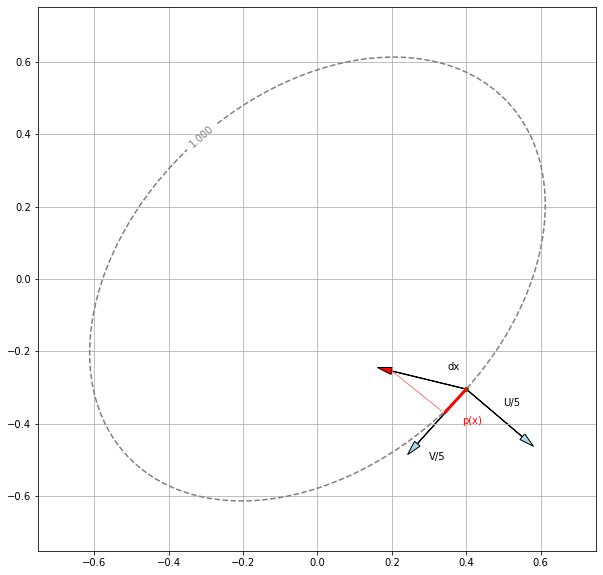

In [2]:
#on prend une fonction f1 en exemple
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0*x1*x1 - 2.0*x1*x2 + 3.0*x2*x2
    
#on plot la ligne de niveau 1

X = np.linspace(-0.75, 0.75, 100)
Y = np.linspace(-0.75, 0.75, 100)
u, v = np.meshgrid(X, Y)
Z = f1(u, v)
contour = plt.contour(u, v, Z, colors="grey",
                      linestyles="dashed", levels=np.array([1]))

#on ajoute un point nous intéressant ainsi que les vecteurs u et v associés à ce points
plt.plot(0.4,(0.8-np.sqrt(6.88))/6, color='green', marker='o', markersize=4, linewidth=0)
gradf = grad(f1)(0.4,(0.8-np.sqrt(6.88))/6)
grad_norme = gradf/(np.sqrt(gradf[0]**2+gradf[1]**2))
plt.arrow(0.4,(0.8-np.sqrt(6.88))/6,grad_norme[0]/5,grad_norme[1]/5, head_width=0.02, head_length=0.04, fc='lightblue', ec='black')
plt.arrow(0.4,(0.8-np.sqrt(6.88))/6,grad_norme[1]/5,-grad_norme[0]/5, head_width=0.02, head_length=0.04, fc='lightblue', ec='black')
plt.annotate("U/5", (0.5,-0.35))
plt.annotate("V/5", (0.3,-0.5))

plt.arrow(0.4,(0.8-np.sqrt(6.88))/6,-0.2,0.05, head_width=0.02, head_length=0.04, fc='red', ec='black')
plt.annotate("dx",(0.35,-0.25))

plt.plot([0.2,0.335],[0.05+(0.8-np.sqrt(6.88))/6,-0.365], color = 'red', linewidth = 0.5)
plt.plot([0.4,0.344],[(0.8-np.sqrt(6.88))/6,-0.367], color = 'red', linewidth = 3)
plt.annotate("p(x)",(0.39,-0.4), color = 'red')

plt.clabel(contour)
plt.grid(True)
plt.show()

### <ins>**Question n°3**</ins> **: Théorème des fonctions implicites local en $x_0$**


Posons la fonction $g: (x_1, x_2, t) \in \mathbb{R}^3 \to (f(x_1, x_2)-c,p(x_1, x_2)-t) \in \mathbb{R}^2$.
$p$ est une fonction affine par rapport à chacune de ses variables donc continûment differentiable ; $f$ est définie comme étant continûment différentiable donc, par assemblage, $g$ est continûment différentiable.



On remarque que $g(x_0,p(x_0)) = (f(x_0)-c,p(x_0)-p(x_0)) = (0,0)$.



On pose pour tout $t \in \mathbb{R}$ $h : x \to g(x)$ et on identifie $dh = \partial_x  g$ à $J_h(x) = \begin{pmatrix} \partial_1 f(x) & \partial_2 f(x) \\ \frac{\partial_2 f(x_0)}{||\nabla f(x_0)||} & -\frac{\partial_1 f(x_0)}{||\nabla f(x_0)||}\end{pmatrix}$
de déterminant


$det(J_h(x))=-(\partial_1 f(x)\frac{\partial_1 f(x_0)}{||\nabla f(x_0)||}+\partial_2 f(x)\frac{\partial_2 f(x_0)}{||\nabla f(x_0)||})$.

On remarque que $det(J_h(x_0)) = -\frac{||\nabla f(x_0)||^2}{||\nabla f(x_0)||} = -||\nabla f(x_0)|| < 0$.

Donc par continuité de $J_h$, il existe un voisinage $U$ de $x_0$ dans lequel $det(J_h(x)) \ne 0$. Donc $\partial_x g$ est inversible sur un voisinage $U$ de $x_0$, donc $g$ est un $C^1$-difféomorphisme local de $x_0$ et est ainsi inversible dans un voisinage $U$ de $x_0$.




On applique le Théorème des fonction implicites :

Il existe un voisinage ouvert $U'$ $\subset$ $U$ de $x_0$ et $V$ de $p(x_0) = 0$ (on notera donc cet intervalle ouvert $V = ]-\epsilon,\epsilon[$ avec $\epsilon > 0$) et une fonction $\gamma : V \to \mathbb{R}^2$ continûment différentiable telle que : 


$g(x,t) = 0 \iff x = \gamma (t)$ 


Or $g(x,t) = (0,0) \iff f(x_1,x_2) = c$ et $p(x_1,x_2) = t$



En conclusion, il existe un voisinage ouvert $U'$ de $x_0$,  tel que $f(x_1,x_2) = c$ si et seulement si $(x_1,x_2)=\gamma (t)$ avec $t = p(x_1,x_2)$.

### <ins>**Question n°4**</ins> **: Quelques propriétés de $\gamma '(t)$**

Soit $V = ]-\epsilon,\epsilon[$ l'intervalle défini précédemment. Soit $t \in ]-\epsilon,\epsilon[$.

Le théorème des fonction implicites donne également l'identité :
$$
\gamma ' (t) = - \partial_x g(x,t)^{-1} \bullet \partial_t g(x,t)
$$

- $\partial_x g(x,t)^{-1}$ est l'inverse d'une matrice 2x2, on a donc directement $\partial_x g(x,t)^{-1} = \frac{1}{det(J_h(x))}\begin{pmatrix} -\frac{\partial_1 f(x_0)}{||\nabla f(x_0)||} & -\partial_2 f(x) \\ -\frac{\partial_2 f(x_0)}{||\nabla f(x_0)||} & \partial_1 f(x)\end{pmatrix} $
avec $x = \gamma(t)$

On calcule facilement $\partial_t g(x,t) = \begin{pmatrix} 0 \\ -1 \end{pmatrix}$

Donc $\gamma ' (t) = \frac{1}{det(J_h(\gamma(t)))} \begin{pmatrix} \partial_2 f(\gamma(t)) & -\partial_1 f(\gamma(t)) \end{pmatrix}$ est non nul (sinon $||\nabla f(\gamma(t))||$ serait également nulle).

- De plus $ \nabla f(\gamma(t)) = \begin{pmatrix} \partial_1 f(\gamma(t)) \\ \partial_2 f(\gamma(t)) \end{pmatrix}$

Donc $\gamma ' (t) \bullet \nabla f(\gamma(t)) = \frac{1}{det(J_h(\gamma(t)))}(-\partial_2 f(\gamma(t))\partial_1 f(\gamma(t))+\partial_2 f(\gamma(t))\partial_1 f(\gamma(t)) = 0$.

Donc $\gamma ' (t)$ est orthogonale à $\nabla f(\gamma(t))$.


## Construction des courbes de niveau

### Méthode de Newton

### <ins>**Question n°5**</ins>

Le but final de notre programme étant de tracer la courbe de niveau, la précision sur la valeur obtenue par méthode de Newton ne dépend que de la résolution graphique qu'on a sur le grapheur. Or sur un écran normal et à la vue des exemples utilisés on peut considérer de la résolution est de l'ordre de 0.001 unité. On prendra donc $\epsilon = 0.001$.

### <ins>**Tâche n°1**</ins>

In [3]:
eps = 10**(-3)
N = 100


def Newton(F, x0, y0, eps=eps, N=N):
    J_F = J(F)
    for i in range(N):
        J_F_inv = np.linalg.inv(J_F(x0, y0))
        A = -np.dot(J_F_inv, F(x0, y0))
        x = x0 + A[0]
        y = y0 + A[1]
        if np.sqrt((x-x0)**2 + (y-y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

### <ins>**Tâche n°2**</ins>

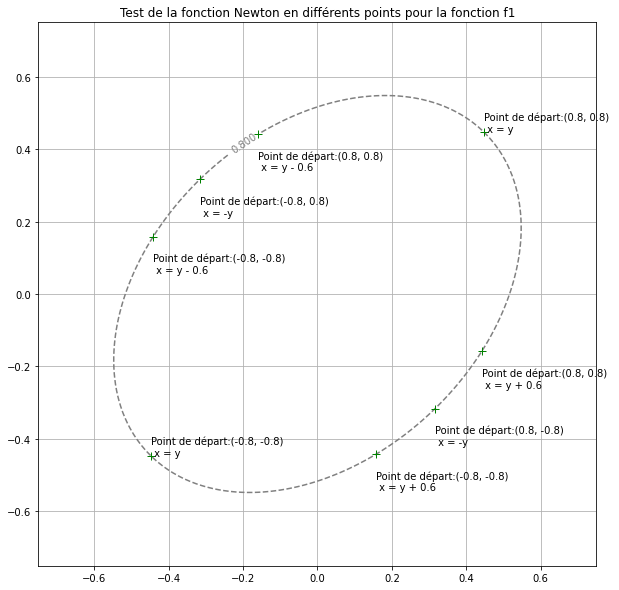

In [4]:
## on valide l'implémentation de Newton sur un exemple
# fonction test
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0*x1*x1 - 2.0*x1*x2 + 3.0*x2*x2

# fonction de recherche avec x1 = x2
def F1(x1, x2):
    return np.array([f1(x1, x2) - 0.8, x1 - x2])

# fonction de recherche avec x1 = -x2
def F2(x1, x2):
    return np.array([f1(x1, x2) - 0.8, x1 + x2])

# fonction de recherche avec x1 = x2 + 0.6
def F3(x1, x2):
    return np.array([f1(x1, x2) - 0.8, x1 - x2 - 0.6])

# fonction de recherche avec x1 = x2 - 0.6
def F4(x1, x2):
    return np.array([f1(x1, x2) - 0.8, x1 - x2 + 0.6])

# on crée les différents points
A = np.array(Newton(F1, 0.8, 0.8))
B = np.array(Newton(F1, -0.8, -0.8))
C = np.array(Newton(F3, 0.8, 0.8))
D = np.array(Newton(F3, -0.8, -0.8))
E = np.array(Newton(F2, 0.8, -0.8))
F = np.array(Newton(F2, -0.8, 0.8))
G = np.array(Newton(F4, 0.8, 0.8))
H = np.array(Newton(F4, -0.8, -0.8))
L = np.array([A, B, C, D, E, F, G, H])

# on crée le contour f1(x, y)=0.8
X = np.linspace(-0.75, 0.75, 100)
Y = np.linspace(-0.75, 0.75, 100)
u, v = np.meshgrid(X, Y)
Z = f1(u, v)
contour = plt.contour(u, v, Z, colors="grey",
                      linestyles="dashed", levels=np.array([0.8]))

# on crée nos points et on affiche le graphe
x = L[::, 0]
y = L[::, 1]
plt.plot(x, y, color='green', marker='+', markersize=8, linewidth=0)
plt.annotate("Point de départ:(0.8, 0.8) \n x = y", (x[0], y[0]))
plt.annotate("Point de départ:(-0.8, -0.8) \n x = y", (x[1], y[1]))
plt.annotate("Point de départ:(0.8, 0.8) \n x = y + 0.6", (x[2], y[2]-0.1))
plt.annotate("Point de départ:(-0.8, -0.8) \n x = y + 0.6", (x[3], y[3]-0.1))
plt.annotate("Point de départ:(0.8, -0.8) \n x = -y", (x[4], y[4]-0.1))
plt.annotate("Point de départ:(-0.8, 0.8) \n x = -y", (x[5], y[5]-0.1))
plt.annotate("Point de départ:(0.8, 0.8) \n x = y - 0.6", (x[6], y[6]-0.1))
plt.annotate("Point de départ:(-0.8, -0.8) \n x = y - 0.6", (x[7], y[7]-0.1))
plt.clabel(contour)
plt.title('Test de la fonction Newton en différents points pour la fonction f1')
plt.grid(True)
plt.show()

### Génération des points

### <ins>**Question n°6**</ins>

Il est possible d'appliquer de nouveau la méthode de Newton implémentée tâche 1. Cette fois ci les conditions à remplir sont :

$$
\begin{equation}
\left\lbrace
\begin{array}{ccc}
f(x_i,y_i) = c \mbox{, pour    } i \in [1,N] \\
\sqrt{(x_i-x_{i-1})^2+(y_i-y_{i-1})^2} = \delta
\end{array}\right.
\end{equation}
$$

On appliquera donc la méthode de Newton à tour de rôle aux fonctions définies pour $i \in [1, N]$ par :

$$
h_i : (x,y) \in \mathbb{R}^2 \to (f(x,y) - c,\sqrt{(x-x_{i-1})^2+(y-y_{i-1})^2} - \delta) \in \mathbb{R}^2
$$

Pour cela, on devra prendre comme premier point non pas $(x_{i-1},y_{i-1})$ par souci de dérivabilité de la fonction mais on prendra le couple $(x_1,y_1)$ défini par :

$$
\begin{pmatrix} x_1\\y_1 \end{pmatrix} = \begin{pmatrix} x_{i-1}\\y_{i-1} \end{pmatrix} + \alpha \begin{pmatrix} \frac{\partial_2 f(x_{i-1},y_{i-1})}{\|\nabla f(x_{i-1},y_{i-1})\|} \\
-\frac{\partial_1 f(x_{i-1},y_{i-1})}{\|\nabla f(x_{i-1},y_{i-1})\|} \end{pmatrix}
$$

où $\alpha << 1$.



### <ins>**Tâche n°3**</ins>

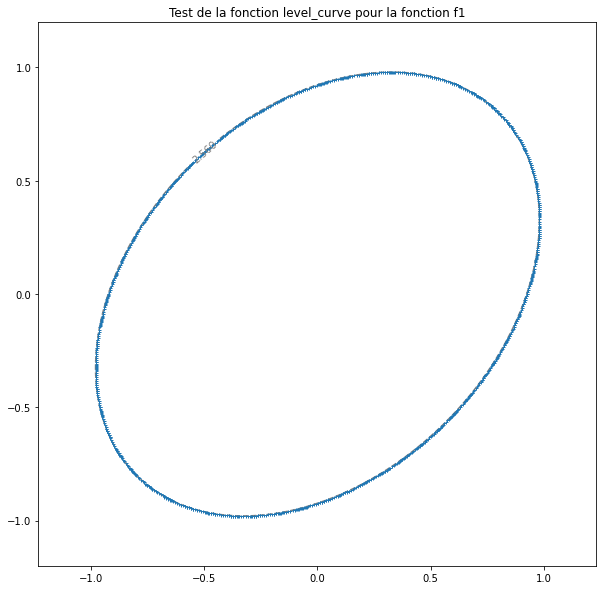

In [5]:
def level_curve(f, x0, y0, delta=0.1, N=1000, eps=eps):
    """
    affiche la courbe de niveau f(x0, y0) par calcul de proche en 
    proche des points par la méthode de Newton, retourne un tableau
    """
    alpha = 10**(-6)
    c = f(x0, y0)
    L = [(x0, y0)]
    grad_f = grad(f)
    for i in range(N):
        x0, y0 = L[-1][0], L[-1][1]
        U = grad_f(x0, y0)
        norme = np.linalg.norm(U, 2)
        U = U/norme

        def H(x, y, x0=x0, y0=y0):
            return np.array([f(x, y) - c, np.sqrt((x-x0)**2 + (y-y0)**2) - delta])
        # on décale légèrement x0 et y0 pour que H soit différentiable
        # au début de la méthode de Newton

        x1, y1 = x0 + alpha*U[1], y0 - alpha*U[0]
        sol = Newton(H, x1, y1)
        L.append(sol)
    return np.array(L)

## validation des résultats
# pour afficher les points calculés
L = level_curve(f1, 0.8, 0.8)
x = [el[0] for el in L]
y = [el[1] for el in L]
plt.plot(x, y, linewidth=0, marker='+', markersize=3)
plt.axis('equal')

# on crée le contour f1(x, y)=0.8
X = np.linspace(-1.2, 1.2, 100)
Y = np.linspace(-1.2, 1.2, 100)
u, v = np.meshgrid(X, Y)
Z = f1(u, v)
contour = plt.contour(u, v, Z, colors="grey",
                      linestyles="dashed", levels=np.array([f1(0.8, 0.8)]))
plt.clabel(contour)
plt.title('Test de la fonction level_curve pour la fonction f1')

plt.show()

### Bouclage et auto-intersection

### <ins>**Question n°7**</ins>

Beaucoup de courbes de niveau finissent par boucler et revenir au point de départ comme le montrent les exemples. Pour être tout à fait exhaustif, il faudrait vérifier si chaque nouveau segment généré intersecte ou non l'un des anciens déjà généré. Mais on peut de façon raisonnablement optimiste ne considérer que le premier segment qui sera croisé est le premier segment généré si on fait l'hypothèse que la courbe de niveau fait une boucle. Ceci est très avantageux du point de vue temps de calcul en faisant passer le nombre de vérifications pour une courbe de niveau complête d'un $ O(n^2)$ à $O(n)$ (avec $n$ le nombre de segments nécessaires à générer la courbe).

### <ins>**Tâche n°4**</ins>

In [6]:
def intersection(P1, P2, P3, P4):
    """
    verifie si les segments [P1,P2] et [P3,P4] sont secants, retourne un booleen
    """
    x1, x2, x3, x4 = P1[0], P2[0], P3[0], P4[0]
    y1, y2, y3, y4 = P1[1], P2[1], P3[1], P4[1]

    # Le point d'intersection doit avoir son abscisse dans Ix défini par
    Ix = [max(min(x1, x2), min(x3, x4)), min(max(x1, x2), max(x3, x4))]

    # Si cet intervalle n'existe pas il n'y a pas d'intersection :
    if Ix[0] > Ix[1]:
        return False
    else:
        if x1 == x2 and x3 != x4:
            # la droite portant [P3,P4] a pour équation y = a2*x+b2 avec
            a2 = (y4-y3)/(x4-x3)
            b2 = -a2*x3+y3
            # on calcule l'ordonnée du point d'intersection
            yi = a2*P1[0]+b2
            # et on vérifie s'il appartient au segment [P1,P2]
            if yi <= max(y1, y2) and yi >= min(y1, y2):
                return True
            else:
                return False

        elif x3 == x4 and x1 != x2:
            a1 = (y2-y1)/(x2-x1)
            b1 = -a1*x1+y1
            yi = a1*x3+b1
            if yi <= max(y3, y4) and yi >= min(y3, y3):
                return True
            else:
                return False
        elif x1 == x2 and x3 == x4:
            # On verifie si les deux segments ont une partie commune
            if max(min(y1, y2), min(y3, y4)) <= min(max(y1, y2), max(y3, y4)):
                return True
            else:
                return False
        else:
            a1 = (y2-y1)/(x2-x1)
            b1 = -a1*x1+y1
            a2 = (y4-y3)/(x4-x3)
            b2 = -a2*x3+y3
            # on distingue les cas de parallélisme
            if a1 == a2 and b1 != b2:
                return False
            elif a1 == a2 and b1 == b2:
                # dans ce cas les segments sont portés par la même droite et
                # comme Ix non nulle on a intersection
                return True
            else:
                # on commence par calculer l'abscisse de point d'intersection
                # des droites portant les segments puis on vérifie s'il
                # appartient à Ix
                x_inter = (b2-b1)/(a1-a2)
                if x_inter <= Ix[1] and x_inter >= Ix[0]:
                    return True
                else:
                    return False


def level_curve1(f, x0, y0, delta=0.1, eps=eps):
    """
    affiche la courbe de niveau f(x0, y0) par calcul de proche en 
    proche des points par la méthode de Newton en vérifiant qu'on ne 
    boucle pas, retourne un tableau
    """
    alpha = 10**(-1)
    c = f(x0, y0)
    L = [(x0, y0)]
    grad_f = grad(f)
    compt = 3
    for i in range(3):
        x0, y0 = L[-1][0], L[-1][1]
        U = grad_f(x0, y0)
        norme = np.linalg.norm(U, 2)
        U = U/norme

        def K(x, y, x0=x0, y0=y0):
            return np.array([f(x, y) - c, np.sqrt((x-x0)**2 + (y-y0)**2) - delta])
        
        # décalage de x0 et y0
        x1, y1 = x0 + alpha*U[1], y0 - alpha*U[0]
        sol = Newton(K, x1, y1)
        L.append(sol)

    while not intersection(L[0], L[1], L[compt-1], L[compt]):
        # le while se finit forcément car la courbe de niveau est un compact 
        # donc borné
        compt += 1
        x0, y0 = L[-1][0], L[-1][1]
        U = grad_f(x0, y0)
        norme = np.linalg.norm(U, 2)
        U = U/norme

        def G(x, y, x0=x0, y0=y0):
            return np.array([f(x, y) - c, np.sqrt((x-x0)**2 + (y-y0)**2) - delta])
        
        # décalage de x0 et y0
        x1, y1 = x0 + alpha*U[1], y0 - alpha*U[0]
        sol = Newton(G, x1, y1)
        L.append(sol)
    return np.array(L)

### <ins>**Tâche n°5**</ins>

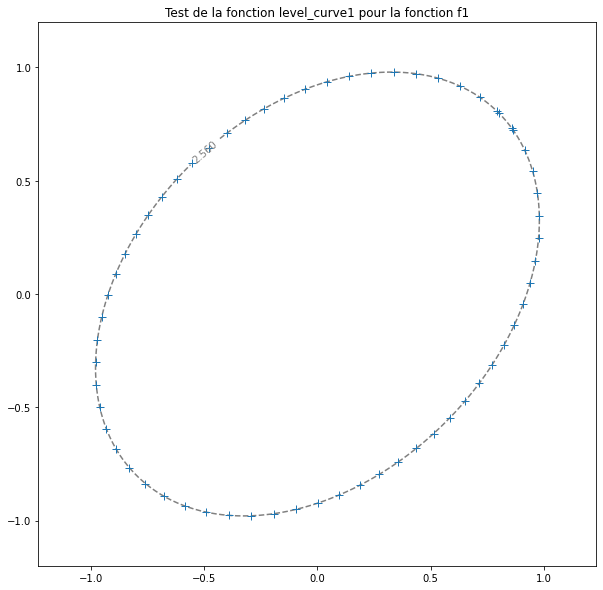

In [7]:
# on vérifie sur un exemple l'implémentation de level_curve1
L = level_curve1(f1, 0.8, 0.8)
x = [el[0] for el in L]
y = [el[1] for el in L]
plt.plot(x, y, linewidth=0, marker='+', markersize=8)
plt.axis('equal')

# on crée le contour
X = np.linspace(-1.2, 1.2, 100)
Y = np.linspace(-1.2, 1.2, 100)
u, v = np.meshgrid(X, Y)
Z = f1(u, v)
contour = plt.contour(u, v, Z, colors="grey",
                      linestyles="dashed", levels=np.array([f1(0.8, 0.8)]))
plt.clabel(contour)
plt.title('Test de la fonction level_curve1 pour la fonction f1')

plt.show()

## Post-traitement

### Interpolation

### <ins>**Question n°8**</ins>

Dans cette question on cherche à interpoler la courbe de niveau entre deux points par un système polynomial tel que :

$$
\begin{equation}
\left\lbrace
\begin{array}{ccc}
x(t) = a+bt+ct^2 \\
y(t) = d+et+ft²
\end{array}\right.
\end{equation}
$$

Afin de déterminer les inconnues $a$, $b$, $c$, $d$, $e$ et $f$, on dispose de conditions aux deux limites $P_1$ et $P_2$ ce qui fait 8 équations et 8 inconnues (en effet deux inconnues viennent se rajouter du fait de la colinéarité des dérivées aux extrémités avec la tangente).
On a donc, en posant $ P_1 = (px_1,py_1)$ et $P_2 = (px_2,py_2)$ ainsi que $u_1 = (u_{10},u_{11})$ et $u_2 = (u_{20},u_{21})$ le système :

$$
\begin{equation}
\left\lbrace
\begin{array}{ccc}
\gamma(0) = P_1\\
\gamma(1) = P_2\\
\gamma '(0) = \mu u_1\\
\gamma '(1) = \lambda u_2\\
\mu , \lambda > 0
\end{array}\right.
\end{equation}
$$

$$\iff$$

$$
\begin{equation}
\left\lbrace
\begin{array}{ccc}
a = px_1\\
d = py_1\\
a+b+c = px_2\\
d+e+f = py_2\\
b = \mu u_{10}\\
e = \mu u_{11}\\
b+2c = \lambda u_{20}\\
e+2f = \lambda u_{21}\\
\mu , \lambda > 0
\end{array}\right.
\end{equation}
$$

Ce qui après résolution donne  :

$$
\begin{equation}
\left\lbrace
\begin{array}{ccc}
a = px_1\\
b = \frac{2u_{10}}{det}[(py_2-py_1)u_{20}+(px_1-px_2)u_{21}]\\
c = \frac{1}{det}[2(py_1-py_2)u_{20}u_{10}+(px_2-px_1)(u_{21}u_{10}+u_{11}u_{20})]\\
d = py_1\\
e = \frac{2u_{11}}{det}[(py_2-py_1)u_{20}+(px_1-px_2)u_{21}]\\
f = \frac{1}{det}[2(px_2-px_1)u_{20}u_{10}+(py_1-py_2)(u_{21}u_{10}+u_{11}u_{20})]\\
\mu = \frac{2}{det}[(py_2-py_1)u_{20}+(px_1-px_2)u_{21}]\\ 
\lambda = \frac{2}{det}[(py_2-py_1)u_{20}+(px_1-px_2)u_{21}]\\
\end{array}\right.
\end{equation}
$$


Avec : 
$$
det := u_{11}u_{20}-u_{10}u_{21}\\
\mu , \lambda > 0
$$

On trouve donc une condition importante $det := u_{11}u_{20}-u_{10}u_{21} \ne 0 $. En réalité $det = -det(u_1,u_2)$, la condition est donc que $u_1$ et $u_2$ ne doivent pas être colinéaires. Si $u_1$ et $u_2$ sont colinéaires, on ne doit alors plus interpoler par un polynôme du second degré mais directement par le segment $[P_1,P_2]$.

On a également les conditions sur $\mu$ et sur $\lambda$ qui ont des conséquences sur $P_1$ et $P_2$ : tout d'abord le cas $P_1 = P_2$ est interdit, et de plus les vecteurs tangents en ces points doivent pointer "les directions s'éloignant de la droite $(P_1,P_2)$".

### <ins>**Tâche n°6**</ins>

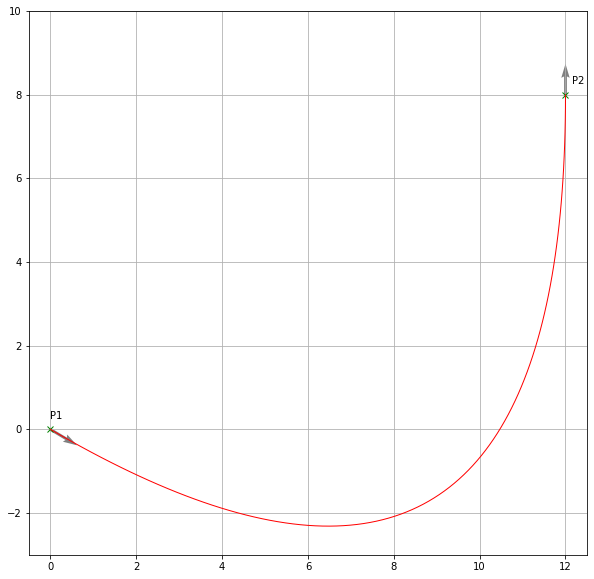

In [8]:
def gamma(t, P1, P2, u1, u2):
    c1 = (P1[0] - P2[0])*u2[1]
    c2 = (P2[0] - P1[0])*u1[1]
    c3 = (P2[1] - P1[1])*u2[0]
    c4 = (P1[1] - P2[1])*u1[0]
    det = u1[1]*u2[0] - u1[0]*u2[1]
    if ((det > 0 and (c3 + c1 > 0 and c4 + c2 > 0)) or (det < 0 and (c3 + c1 < 0 and c4 + c2 < 0))):
        a = P1[0]
        d = P1[1]
        b = 2.0*u1[0]*((P2[1] - P1[1])*u2[0] + (P1[0] - P2[0])*u2[1])/det
        e = 2.0*u1[1]*((P2[1] - P1[1])*u2[0] + (P1[0] - P2[0])*u2[1])/det
        c = (2.0*(P1[1] - P2[1])*u1[0]*u2[0] +
             (P2[0] - P1[0])*(u1[0]*u2[1] + u1[1]*u2[0]))/det
        f = (2.0*(P2[0] - P1[0])*u2[1]*u1[1] +
             (P1[1] - P2[1])*(u1[0]*u2[1] + u1[1]*u2[0]))/det

        return np.array([a + b*t + c*t**2, d + e*t + f*t**2])
    else:
        return np.array((P1[0] + (P2[0] - P1[0])*t, P1[1] + (P2[1] - P1[1])*t))


# validation sur un exemple
P1 = np.array((0, 0))
P2 = np.array((12, 8))
u1 = np.array((5, -3))
u2 = np.array((0, 1))
t = np.linspace(0, 1, 100)
interp = gamma(t, P1, P2, u1, u2)

plt.plot(np.array([P1[0], P2[0]]), np.array([P1[1], P2[1]]),
         marker='x', color='green', markersize=6, linewidth=0)
plt.quiver(np.array(P1[0]), np.array(P1[1]), np.array(u1[0]), np.array(
    u1[1]), color='grey', width=0.005)
plt.quiver(np.array(P2[0]), np.array(P2[1]), np.array(u2[0]), np.array(
    u2[1]), color='grey', width=0.005)
plt.plot(interp[0], interp[1], color='red', linewidth=1)
plt.annotate("P1", (P1[0], P1[1] + 0.25))
plt.annotate("P2", (P2[0] + 0.15, P2[1] + 0.25))
plt.grid(True)
plt.axis([-0.5, 12.5, -3, 10])
plt.show()

### Intégration

### <ins>**Tâche n°7**</ins>

In [9]:
def level_curve2(f, x0, y0, oversampling: int, delta=0.1, eps=eps):
    if oversampling == 1:
        return level_curve1(f, x0, y0)
    elif oversampling > 1:
        grad_f = grad(f)
        N = oversampling + 1
        T = level_curve1(f, x0, y0)
        resultat = [T[0]]
        for (i, el) in enumerate(T[1:], start=1):
            resultat.append(el)
            t = np.linspace(0.0, 1.0, N)
            u1 = grad_f(T[i-1][0], T[i-1][1])
            u2 = grad_f(el[0], el[1])
            interpolation = gamma(t, T[i-1], el, u1, u2)
            points_suppl = [
                np.array([interpolation[0][i], interpolation[1][i]]) for i in range(N)
            ]
            resultat = resultat + points_suppl
        return np.array(resultat)
    else:
        print('Le paramètre oversampling doit être supérieur ou égal à 1')

### <ins>**Tâche n°8**</ins>

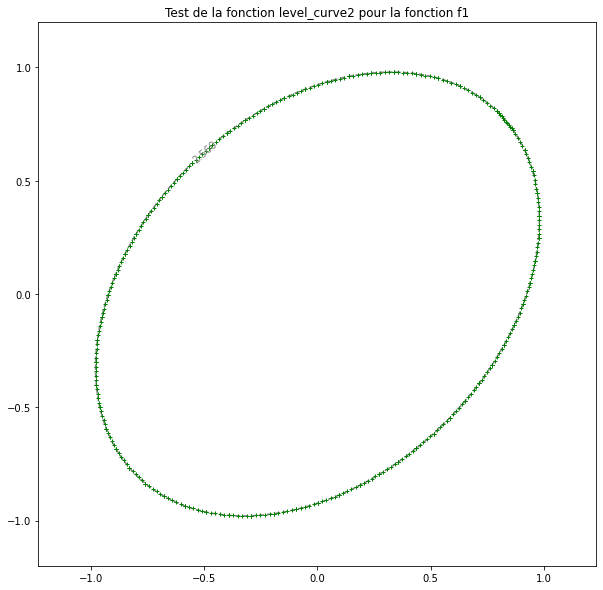

In [10]:
# on vérifie sur un exemple l'implémentation de level_curve2
L = level_curve2(f1, 0.8, 0.8, 5)
x = np.array([el[0] for el in L])
y = np.array([el[1] for el in L])
plt.plot(x, y, '+g', linewidth=2, markersize=4)
plt.axis('equal')

# on crée le contour f1(x, y)=f1(0.8, 0.8)
X = np.linspace(-1.2, 1.2, 100)
Y = np.linspace(-1.2, 1.2, 100)
u, v = np.meshgrid(X, Y)
Z = f1(u, v)
contour = plt.contour(u, v, Z, colors="grey",
                      linestyles="dashed", levels=np.array([f1(0.8, 0.8)]))
plt.clabel(contour)
plt.title('Test de la fonction level_curve2 pour la fonction f1')

plt.show()